<a href="https://colab.research.google.com/github/zenikigai/Tugas_akhir1/blob/main/Klasifikasi_gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip


Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM

In [14]:
import os
import shutil
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from IPython.display import Image, display
from keras.preprocessing import image
import numpy as np

In [3]:
# Path ke direktori dataset
dataset_dir = 'rockpaperscissors'

# List kategori kertas, batu, gunting
categories = ['paper', 'rock', 'scissors']

# Membuat direktori train dan validation di dalam folder rockpaperscissors
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'validation')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Membagi dataset menjadi train dan validation set
for category in categories:
    category_dir = os.path.join(dataset_dir, category)
    train_category_dir = os.path.join(train_dir, category)
    val_category_dir = os.path.join(val_dir, category)

    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(val_category_dir, exist_ok=True)

    # Membagi dataset menggunakan train_test_split
    train_images, val_images = train_test_split(os.listdir(category_dir), test_size=0.4, random_state=42)

    # Menyalin gambar ke direktori train dan validation
    for img in train_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(train_category_dir, img))

    for img in val_images:
        shutil.copy(os.path.join(category_dir, img), os.path.join(val_category_dir, img))


In [11]:
# Membuat objek ImageDataGenerator untuk augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# Mengatur parameter generator
batch_size = 32
target_size = (150, 150)

# Membuat generator untuk data training
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Membuat generator untuk data validasi
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [18]:
# Membuat model sequential
model = Sequential()

# Menambahkan layer konvolusi dan max pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Mengubah matriks gambar menjadi vektor fitur
model.add(Flatten())

# Menambahkan layer dense
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer untuk mengurangi overfitting
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Melatih model dengan jumlah epoch yang lebih banyak
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,  # Meningkatkan jumlah epoch
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

Epoch 1/5
41/41 [==============================] - 99s 2s/step - loss: 0.1696 - accuracy: 0.9459 - val_loss: 0.1043 - val_accuracy: 0.9606
Epoch 2/5
41/41 [==============================] - 91s 2s/step - loss: 0.2012 - accuracy: 0.9367 - val_loss: 0.0567 - val_accuracy: 0.9850
Epoch 3/5
41/41 [==============================] - 90s 2s/step - loss: 0.1995 - accuracy: 0.9306 - val_loss: 0.0605 - val_accuracy: 0.9873
Epoch 4/5
41/41 [==============================] - 97s 2s/step - loss: 0.1926 - accuracy: 0.9383 - val_loss: 0.0560 - val_accuracy: 0.9873
Epoch 5/5
41/41 [==============================] - 96s 2s/step - loss: 0.1257 - accuracy: 0.9566 - val_loss: 0.0474 - val_accuracy: 0.9873


Saving 0Flw60Z2MAWWKn6S.png to 0Flw60Z2MAWWKn6S.png
1/1 [==============================] - 0s 42ms/step


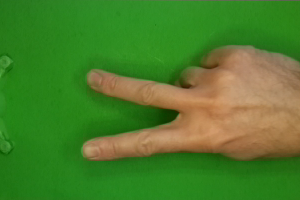

Predicted Class: scissors


In [24]:
# Membuat dictionary untuk mapping indeks kelas dengan nama kelas
class_mapping = {v: k for k, v in train_generator.class_indices.items()}

# Fungsi untuk prediksi
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)

    # Menggunakan class_mapping untuk mendapatkan nama kelas
    predicted_class = class_mapping[predicted_class_index]

    return predicted_class

# Widget untuk unggah gambar
uploaded = files.upload()

# Mendapatkan path gambar yang diunggah
img_path = list(uploaded.keys())[0]

# Melakukan prediksi
predicted_class = predict_image(img_path)

# Menampilkan gambar dan hasil prediksi
display(Image(img_path))
print("Predicted Class:", predicted_class)